In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [2]:
dataset=pd.read_csv("train.csv")

In [3]:
dataset

,Employee_Id,Avg_Working_Hours_Per_Day,Work_From,Work_Pressure,Manager_Support,Sleeping_Habit,Exercise_Habit,Job_Satisfaction,Work_Life_Balance,Social_Person,Lives_With_Family,Working_State,Stress_Level
0,EMP0001,6.7,Home,3,4,4,2,5,No,5,Yes,Karnataka,3
1,EMP0002,6.9,Home,1,1,5,4,3,Yes,3,Yes,Pune,4
2,EMP0003,15.1,Office,3,2,3,5,1,No,2,No,Delhi,1
3,EMP0004,10.7,Hybrid,3,2,5,3,2,No,1,No,Hyderabad,2
4,EMP0005,11.8,Home,2,2,4,1,5,No,5,Yes,Hyderabad,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EMP2996,8.1,Office,2,3,3,2,3,No,4,Yes,Chennai,1
2996,EMP2997,8.5,Office,2,1,3,2,5,No,5,Yes,Delhi,4
2997,EMP2998,10.3,Office,4,1,5,5,4,Yes,4,No,Chennai,3
2998,EMP2999,12.2,Office,3,4,3,5,5,Yes,4,Yes,Karnataka,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
Employee_Id                  3000 non-null object
Avg_Working_Hours_Per_Day    3000 non-null float64
Work_From                    3000 non-null object
Work_Pressure                3000 non-null int64
Manager_Support              3000 non-null int64
Sleeping_Habit               3000 non-null int64
Exercise_Habit               3000 non-null int64
Job_Satisfaction             3000 non-null int64
Work_Life_Balance            3000 non-null object
Social_Person                3000 non-null int64
Lives_With_Family            3000 non-null object
Working_State                3000 non-null object
Stress_Level                 3000 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 304.8+ KB


In [5]:
dataset.isnull().sum()

Employee_Id                  0
Avg_Working_Hours_Per_Day    0
Work_From                    0
Work_Pressure                0
Manager_Support              0
Sleeping_Habit               0
Exercise_Habit               0
Job_Satisfaction             0
Work_Life_Balance            0
Social_Person                0
Lives_With_Family            0
Working_State                0
Stress_Level                 0
dtype: int64

In [6]:
dataset.drop("Employee_Id",axis=1,inplace=True)

In [7]:
#seperate Quan and Qual:

quan=[]
qual=[]
for columnname in dataset.columns:
    if(dataset[columnname]).dtype=='O':
        qual.append(columnname)
    else:
        quan.append(columnname)

In [8]:
quan

['Avg_Working_Hours_Per_Day',
 'Work_Pressure',
 'Manager_Support',
 'Sleeping_Habit',
 'Exercise_Habit',
 'Job_Satisfaction',
 'Social_Person',
 'Stress_Level']

In [9]:
qual

['Work_From', 'Work_Life_Balance', 'Lives_With_Family', 'Working_State']

In [10]:
#univariate & Bivariate Analysis.

def univariate(dataset, quan):
    descriptive = pd.DataFrame(
        index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%",
               "99%","Q4:100%","IQR","1.5rule","lesser","greater",
               "min","max","skewness","kurtosis","variance","standarddeviation"],
        columns=quan
    )

    for column in quan:
        series = dataset[column].dropna()

        descriptive.loc["Mean", column] = series.mean()
        descriptive.loc["Median", column] = series.median()

        mode_val = series.mode()
        descriptive.loc["Mode", column] = mode_val[0] if not mode_val.empty else 0

        q1 = series.quantile(0.25)
        q2 = series.quantile(0.50)
        q3 = series.quantile(0.75)

        descriptive.loc["Q1:25%", column] = q1
        descriptive.loc["Q2:50%", column] = q2
        descriptive.loc["Q3:75%", column] = q3
        descriptive.loc["99%", column] = series.quantile(0.99)
        descriptive.loc["Q4:100%", column] = series.max()

        IQR = q3 - q1
        descriptive.loc["IQR", column] = IQR
        descriptive.loc["1.5rule", column] = 1.5 * IQR
        descriptive.loc["lesser", column] = q1 - 1.5 * IQR
        descriptive.loc["greater", column] = q3 + 1.5 * IQR

        descriptive.loc["min", column] = series.min()
        descriptive.loc["max", column] = series.max()
        descriptive.loc["skewness", column] = series.skew()
        descriptive.loc["kurtosis", column] = series.kurtosis()
        descriptive.loc["variance", column] = series.var()
        descriptive.loc["standarddeviation", column] = series.std()

    return descriptive



In [11]:
descriptive=univariate(dataset,quan)

In [12]:
descriptive

,Avg_Working_Hours_Per_Day,Work_Pressure,Manager_Support,Sleeping_Habit,Exercise_Habit,Job_Satisfaction,Social_Person,Stress_Level
Mean,9.3033,3.017,2.992,3.03,2.985,2.984,2.99233,2.99733
Median,9.1,3,3,3,3,3,3,3
Mode,9.1,4,2,3,4,1,3,1
Q1:25%,8.1,2,2,2,2,2,2,2
Q2:50%,9.1,3,3,3,3,3,3,3
Q3:75%,10.3,4,4,4,4,4,4,4
99%,15.201,5,5,5,5,5,5,5
Q4:100%,16,5,5,5,5,5,5,5
IQR,2.2,2,2,2,2,2,2,2
1.5rule,3.3,3,3,3,3,3,3,3


In [13]:
lesser=[]
greater=[]
for columnname in quan:
    if descriptive[columnname]["min"]<descriptive[columnname]["lesser"]:
        lesser.append(columnname)
    if descriptive[columnname]["max"]>descriptive[columnname]["greater"]:
        greater.append(columnname)

In [14]:
lesser

['Avg_Working_Hours_Per_Day']

In [15]:

greater

['Avg_Working_Hours_Per_Day']

In [16]:
for columnname in lesser:
    dataset.loc[dataset[columnname]<descriptive[columnname]["lesser"],columnname]=descriptive[columnname]["lesser"]
    descriptive[columnname]["min"]=dataset[columnname].min()
for columnname in greater:
    dataset.loc[dataset[columnname]>descriptive[columnname]["greater"],columnname]=descriptive[columnname]["greater"]
    descriptive[columnname]["max"]=dataset[columnname].max()

In [17]:
lesser=[]
greater=[]
for columnname in quan:
    if descriptive[columnname]["min"]<descriptive[columnname]["lesser"]:
        lesser.append(columnname)
    if descriptive[columnname]["max"]>descriptive[columnname]["greater"]:
        greater.append(columnname)

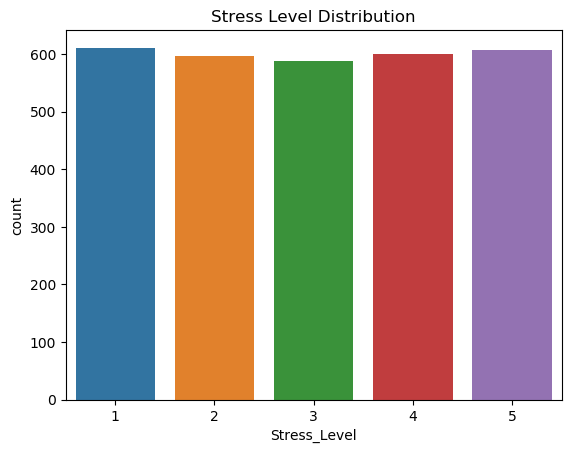

In [20]:
sns.countplot(x=dataset["Stress_Level"])
plt.title("Stress Level Distribution")
plt.show()

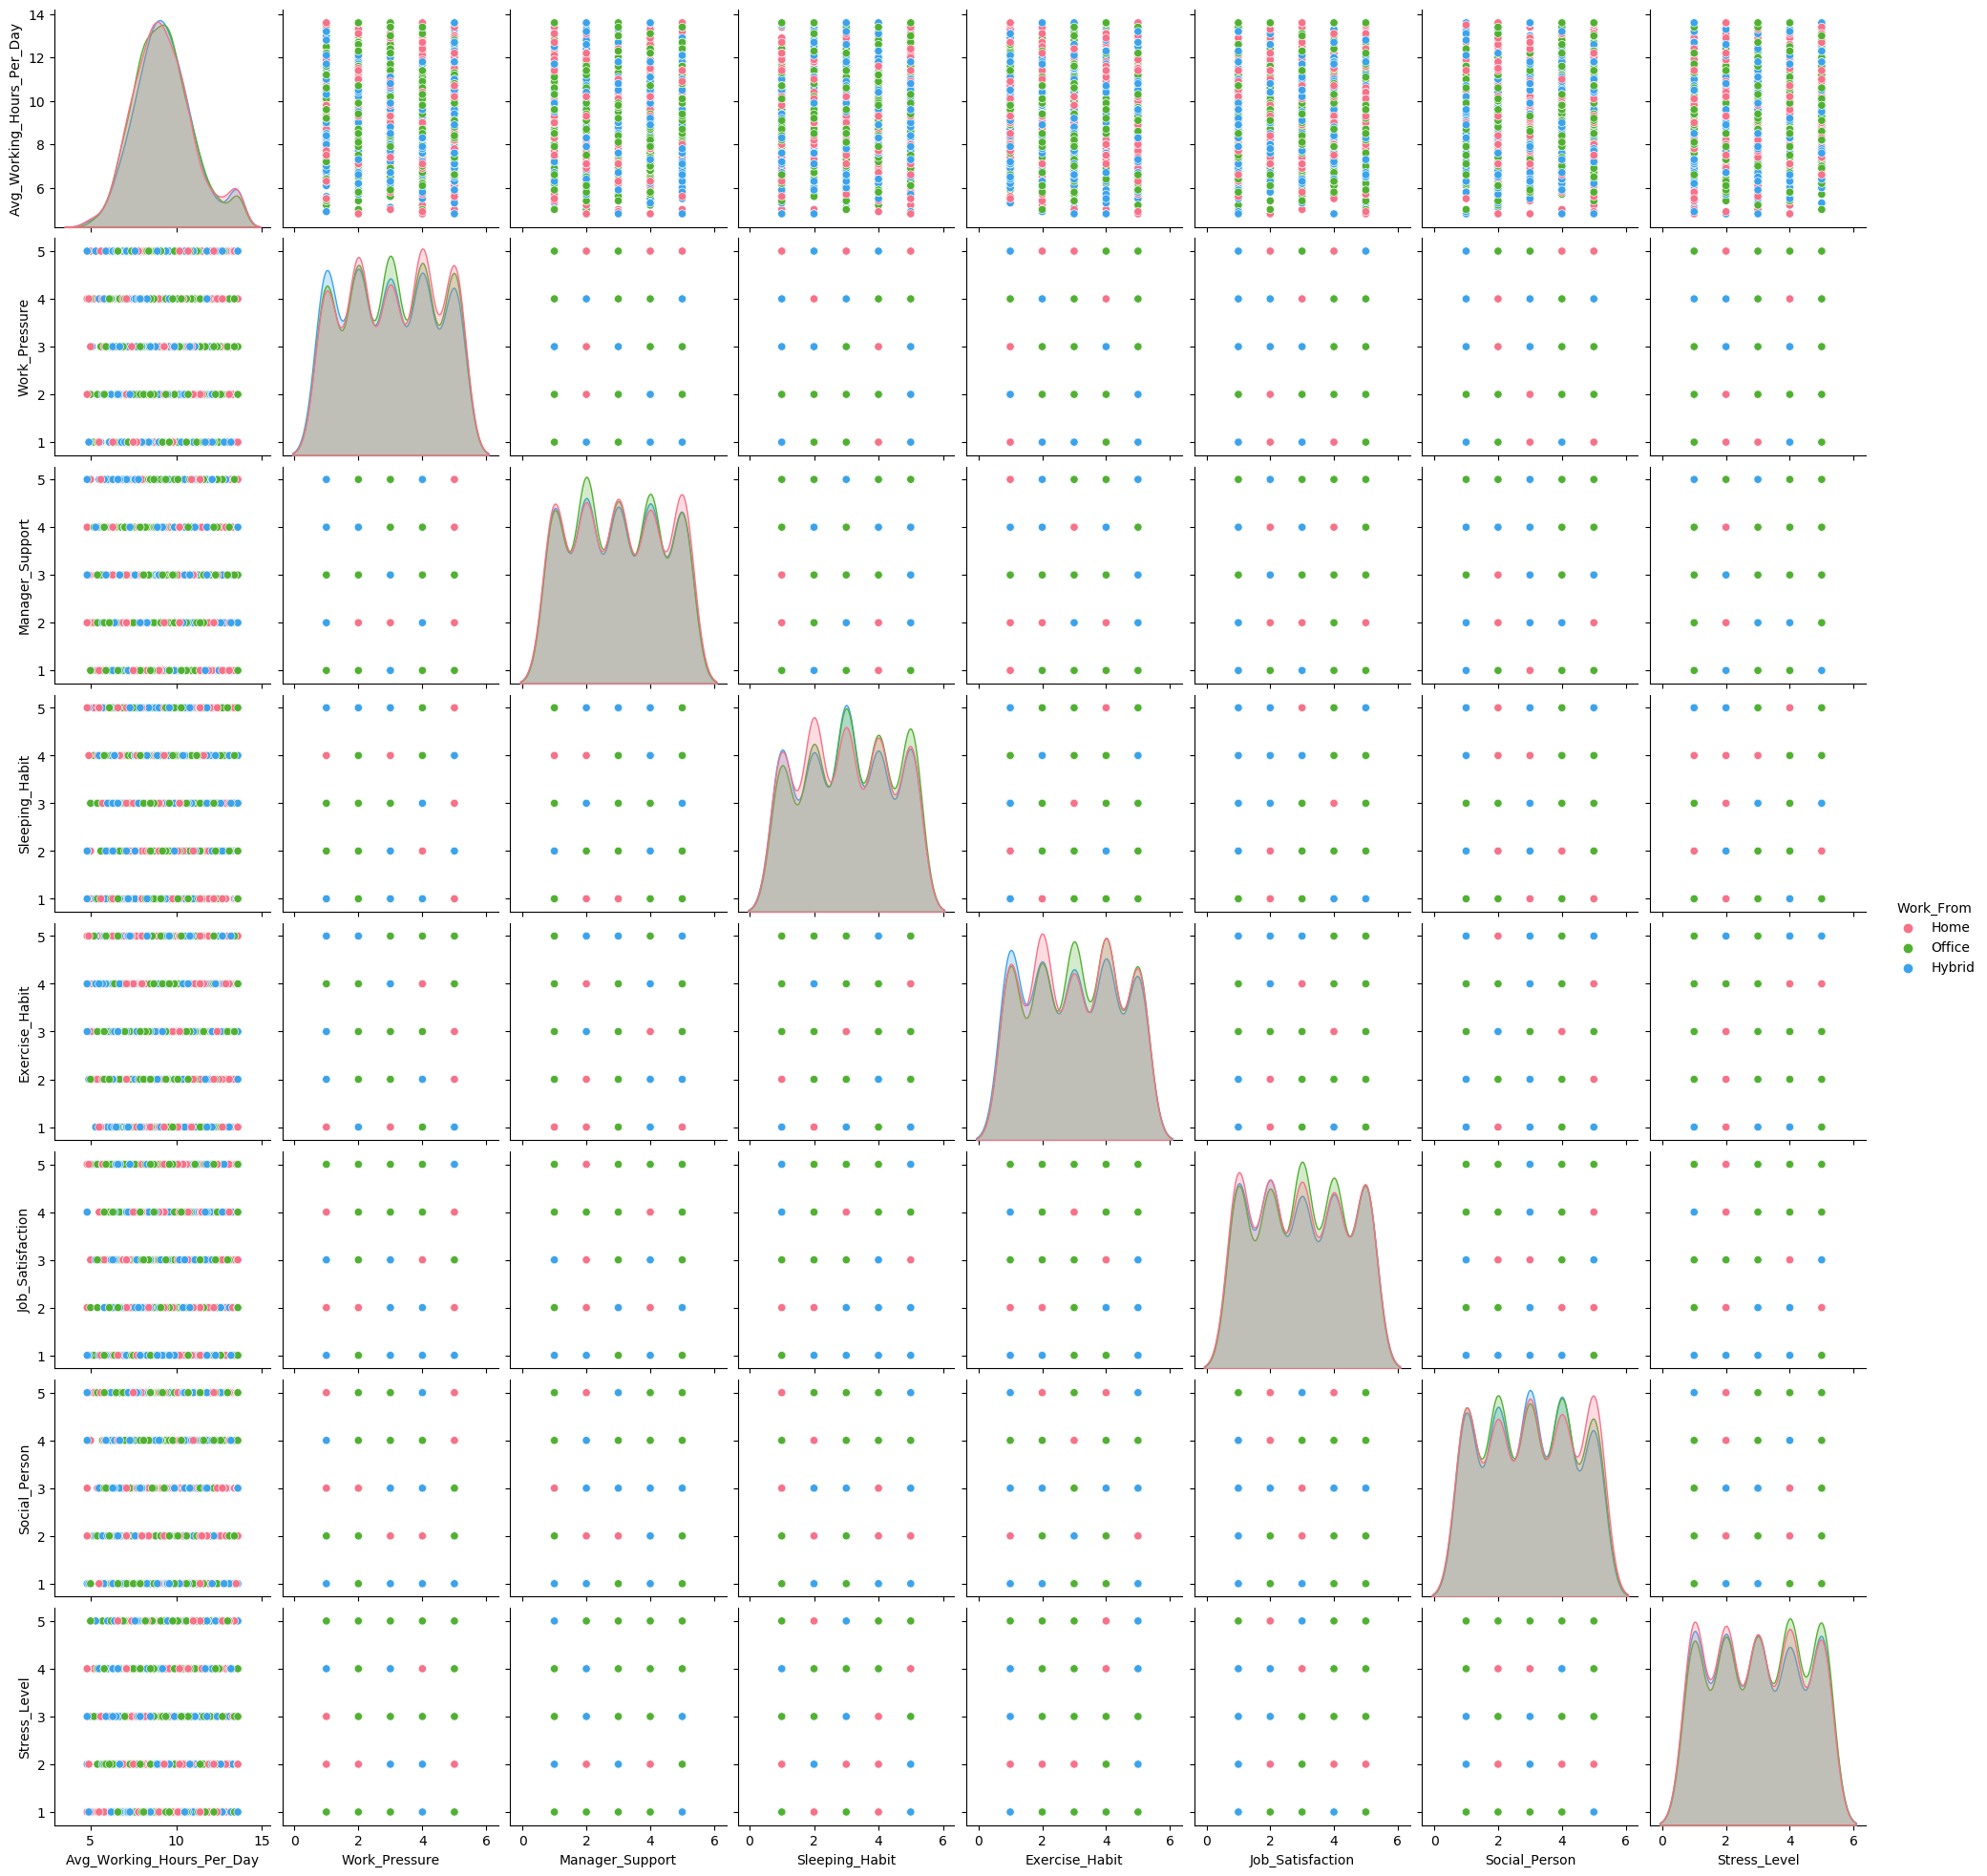

In [21]:

sns.pairplot(dataset,hue='Work_From',diag_kind='kde',kind="scatter",palette="husl")

plt.show()

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


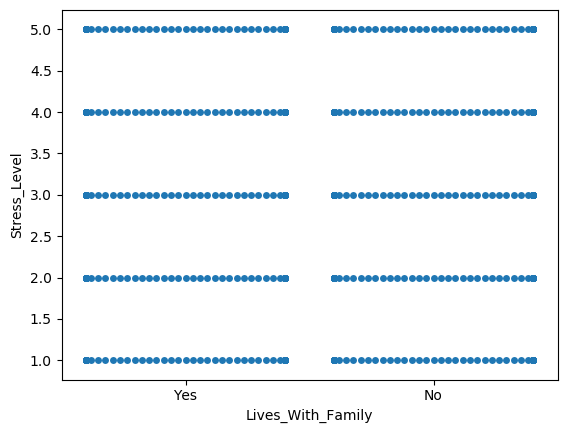

In [22]:
#Categorical Plot
sns.swarmplot(x="Lives_With_Family", y="Stress_Level",data=dataset)
plt.show()

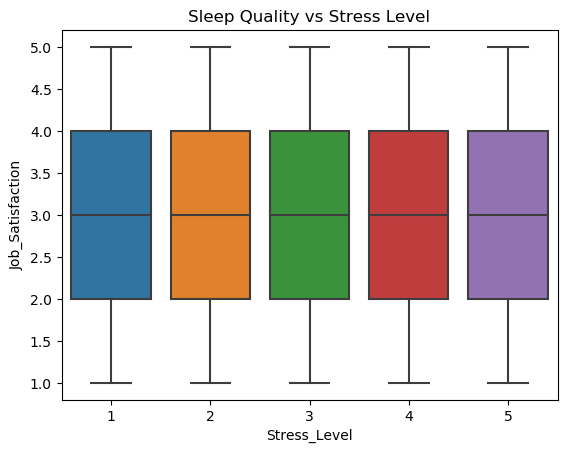

In [26]:

sns.boxplot(x=dataset["Stress_Level"],y=dataset["Job_Satisfaction"])
plt.title("Sleep Quality vs Stress Level")
plt.show()

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


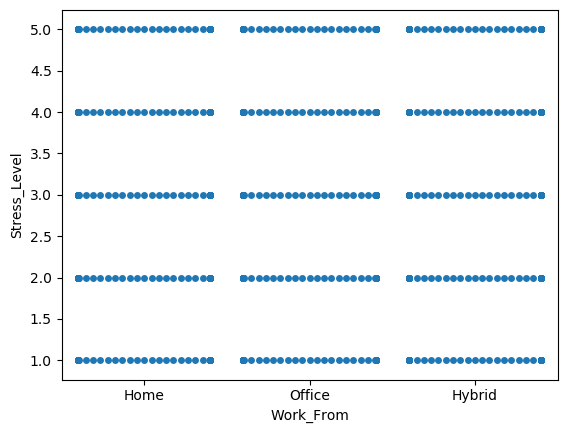

In [27]:
sns.swarmplot(x="Work_From", y="Stress_Level",data=dataset)
plt.show()

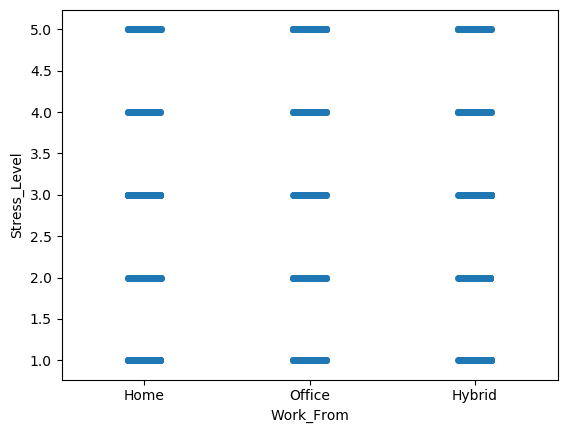

In [28]:
sns.stripplot(x="Work_From", y="Stress_Level",data=dataset)
plt.show()

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


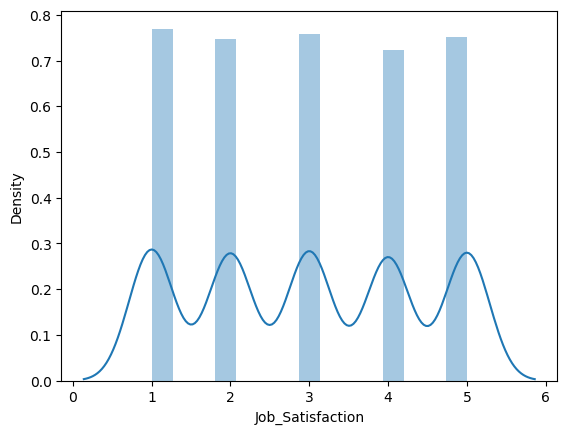

In [29]:
sns.distplot(dataset["Job_Satisfaction"])


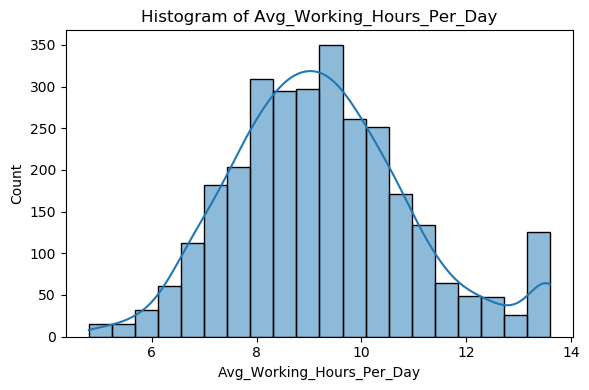

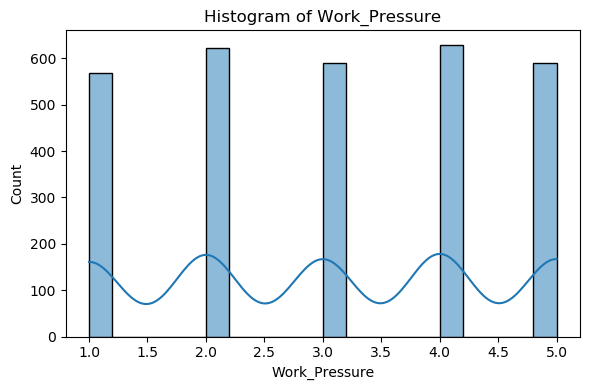

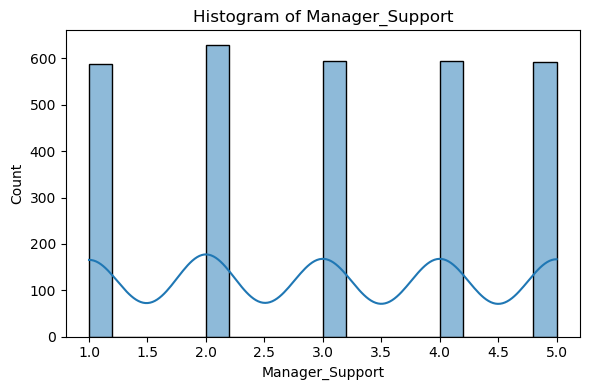

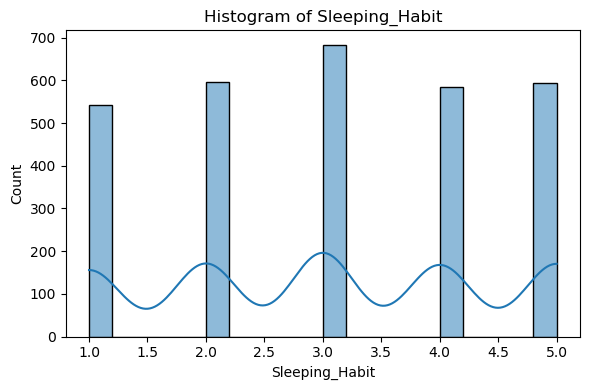

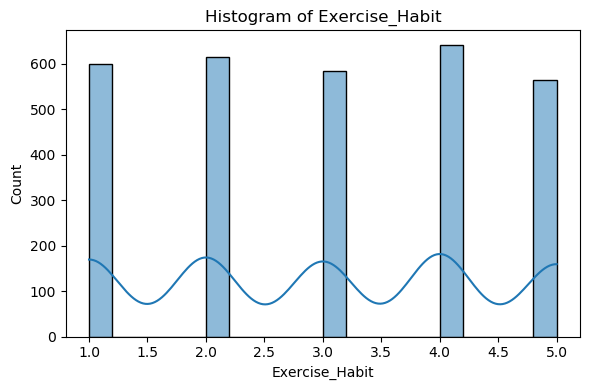

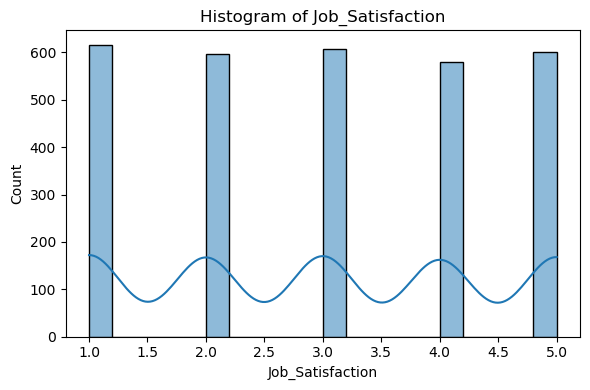

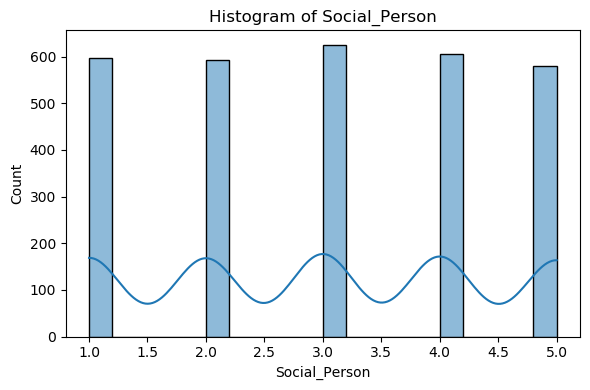

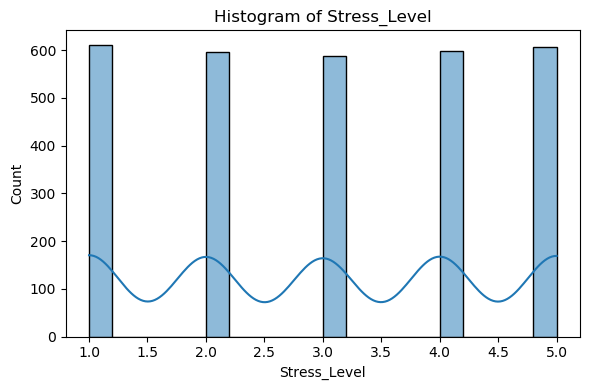

In [30]:
for columnname in quan:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset[columnname], bins=20, kde=True)
    plt.title(f'Histogram of {columnname}')
    plt.tight_layout()
    plt.show()

In [31]:
dataset.corr()

,Avg_Working_Hours_Per_Day,Work_Pressure,Manager_Support,Sleeping_Habit,Exercise_Habit,Job_Satisfaction,Social_Person,Stress_Level
Avg_Working_Hours_Per_Day,1.000000,0.027724,0.009271,0.026387,-0.001621,-0.020056,0.020336,0.008793
Work_Pressure,0.027724,1.000000,-0.006351,-0.034359,0.013189,-0.026346,0.009903,-0.001650
Manager_Support,0.009271,-0.006351,1.000000,0.009377,0.033863,0.023788,0.006213,0.014309
Sleeping_Habit,0.026387,-0.034359,0.009377,1.000000,-0.042258,-0.000945,0.003731,0.045525
Exercise_Habit,-0.001621,0.013189,0.033863,-0.042258,1.000000,0.023153,-0.014120,-0.034788
Job_Satisfaction,-0.020056,-0.026346,0.023788,-0.000945,0.023153,1.000000,0.008645,0.000144
Social_Person,0.020336,0.009903,0.006213,0.003731,-0.014120,0.008645,1.000000,0.001828
Stress_Level,0.008793,-0.001650,0.014309,0.045525,-0.034788,0.000144,0.001828,1.000000


In [32]:
dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)

In [33]:
dataset

,Avg_Working_Hours_Per_Day,Work_Pressure,Manager_Support,Sleeping_Habit,Exercise_Habit,Job_Satisfaction,Social_Person,Stress_Level,Work_From_Hybrid,Work_From_Office,Work_Life_Balance_Yes,Lives_With_Family_Yes,Working_State_Delhi,Working_State_Hyderabad,Working_State_Karnataka,Working_State_Pune
0,6.7,3,4,4,2,5,5,3,0,0,0,1,0,0,1,0
1,6.9,1,1,5,4,3,3,4,0,0,1,1,0,0,0,1
2,13.6,3,2,3,5,1,2,1,0,1,0,0,1,0,0,0
3,10.7,3,2,5,3,2,1,2,1,0,0,0,0,1,0,0
4,11.8,2,2,4,1,5,5,5,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8.1,2,3,3,2,3,4,1,0,1,0,1,0,0,0,0
2996,8.5,2,1,3,2,5,5,4,0,1,0,1,1,0,0,0
2997,10.3,4,1,5,5,4,4,3,0,1,1,0,0,0,0,0
2998,12.2,3,4,3,5,5,4,1,0,1,1,1,0,0,1,0


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
Avg_Working_Hours_Per_Day    3000 non-null float64
Work_Pressure                3000 non-null int64
Manager_Support              3000 non-null int64
Sleeping_Habit               3000 non-null int64
Exercise_Habit               3000 non-null int64
Job_Satisfaction             3000 non-null int64
Social_Person                3000 non-null int64
Stress_Level                 3000 non-null int64
Work_From_Hybrid             3000 non-null int32
Work_From_Office             3000 non-null int32
Work_Life_Balance_Yes        3000 non-null int32
Lives_With_Family_Yes        3000 non-null int32
Working_State_Delhi          3000 non-null int32
Working_State_Hyderabad      3000 non-null int32
Working_State_Karnataka      3000 non-null int32
Working_State_Pune           3000 non-null int32
dtypes: float64(1), int32(8), int64(7)
memory usage: 281.4 KB


In [35]:
def selectkbest(indep,depen,n):
    from sklearn.feature_selection import SelectKBest, chi2
    selector = SelectKBest(score_func=chi2, k=n)
    fit1= selector.fit(indep,depen)
    x_new = fit1.transform(indep)
    return x_new,selector

In [36]:
def split_scalar(indep,depen):
    X_train, X_test, y_train, y_test = train_test_split(indep, depen, test_size = 0.25, random_state = 0)   
    return X_train, X_test, y_train, y_test   

In [37]:
def cm_prediction(classifier,X_test):
    y_pred = classifier.predict(X_test)# Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import classification_report 
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    Accuracy=accuracy_score(y_test, y_pred )
    report=classification_report(y_test, y_pred)
    return  classifier,Accuracy,report,X_test,y_test,cm

In [38]:
def selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [39]:
def logistic(X_train,y_train,X_test):       
    # Logistic Regression: A standard for binary classification,it predicts the probability.
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm   

In [40]:
def svm_linear(X_train,y_train,X_test):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

In [41]:
def svm_NL(X_train,y_train,X_test):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

In [42]:
def Navie(X_train,y_train,X_test):
    # Fitting Navie to the Training set
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm  

In [43]:
def knn(X_train,y_train,X_test):
    # Fitting K-NN to the Training set
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

In [44]:
def Decision(X_train,y_train,X_test):
    # Fitting Decision-Tree to the Training set
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm 

In [45]:
def random(X_train,y_train,X_test):
    # Fitting Random Forest to the Training set
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

In [47]:
indep = dataset.drop("Stress_Level", axis=1)   # input features
depen = dataset["Stress_Level"] #output

In [48]:
indep

,Avg_Working_Hours_Per_Day,Work_Pressure,Manager_Support,Sleeping_Habit,Exercise_Habit,Job_Satisfaction,Social_Person,Work_From_Hybrid,Work_From_Office,Work_Life_Balance_Yes,Lives_With_Family_Yes,Working_State_Delhi,Working_State_Hyderabad,Working_State_Karnataka,Working_State_Pune
0,6.7,3,4,4,2,5,5,0,0,0,1,0,0,1,0
1,6.9,1,1,5,4,3,3,0,0,1,1,0,0,0,1
2,13.6,3,2,3,5,1,2,0,1,0,0,1,0,0,0
3,10.7,3,2,5,3,2,1,1,0,0,0,0,1,0,0
4,11.8,2,2,4,1,5,5,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8.1,2,3,3,2,3,4,0,1,0,1,0,0,0,0
2996,8.5,2,1,3,2,5,5,0,1,0,1,1,0,0,0
2997,10.3,4,1,5,5,4,4,0,1,1,0,0,0,0,0
2998,12.2,3,4,3,5,5,4,0,1,1,1,0,0,1,0


In [49]:
depen

0       3
1       4
2       1
3       2
4       5
       ..
2995    1
2996    4
2997    3
2998    1
2999    2
Name: Stress_Level, Length: 3000, dtype: int64

In [50]:
x_new,selector=selectkbest(indep,depen,9)       
selected_mask=selector.get_support()
selected_features=indep.columns[selected_mask]
print(selected_features)
x_new


Index(['Manager_Support', 'Sleeping_Habit', 'Exercise_Habit',
       'Work_From_Office', 'Work_Life_Balance_Yes', 'Lives_With_Family_Yes',
       'Working_State_Delhi', 'Working_State_Karnataka', 'Working_State_Pune'],
      dtype='object')


array([[4., 4., 2., ..., 0., 1., 0.],
       [1., 5., 4., ..., 0., 0., 1.],
       [2., 3., 5., ..., 1., 0., 0.],
       ...,
       [1., 5., 5., ..., 0., 0., 0.],
       [4., 3., 5., ..., 0., 1., 0.],
       [2., 1., 2., ..., 0., 1., 0.]])

In [51]:
acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

In [52]:

X_train, X_test, y_train, y_test=split_scalar(x_new,depen) 

In [53]:
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

In [54]:
result

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.196,0.196,0.205333,0.194667,0.189333,0.221333,0.212


In [87]:
#Recurrsive Feature Elimation:
def rfeFeature(indep,depen,n):
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.feature_selection import RFE
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    rfelist=[]
    log_model = LogisticRegression(solver='lbfgs')
    RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    NB = GaussianNB()
    DT = DecisionTreeClassifier(criterion = 'gini', max_features='sqrt',splitter='best',random_state = 0)
    svc_model = SVC(kernel = 'linear', random_state = 0)
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    rfemodellist=[log_model,svc_model,RF,DT] 
    for i in   rfemodellist:
        print(i)
        log_rfe = RFE(i, n)
        log_fit = log_rfe.fit(indep, depen)
        log_rfe_feature=log_fit.transform(indep)
        rfelist.append(log_rfe_feature)
    return rfelist

In [88]:
def rfe_classification(acclog1,accsvml1,accsvmnl1,accknn1,accnav1,accdes1,accrf1): 
    rfedataframe=pd.DataFrame(index=['Logistic','SVC','Random','DecisionTree'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(rfedataframe.index):
        rfedataframe.loc[idex]=[acclog1[number],accsvml1[number],accsvmnl1[number],accknn1[number],accnav1[number],accdes1[number],accrf1[number]]
        
    return rfedataframe

In [89]:
rfelist=rfeFeature(indep,depen,3)       

acclog1=[]
accsvml1=[]
accsvmnl1=[]
accknn1=[]
accnav1=[]
accdes1=[]
accrf1=[]

for i in rfelist:
    X_train, X_test, y_train, y_test=split_scalar(i,depen)   
    classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
    acclog1.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
    accsvml1.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
    accsvmnl1.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
    accknn1.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
    accnav1.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
    accdes1.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
    accrf1.append(Accuracy)
    
result1=rfe_classification(acclog1,accsvml1,accsvmnl1,accknn1,accnav1,accdes1,accrf1)

result1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-p

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
Logistic,0.205333,0.206667,0.192,0.202667,0.196,0.188,0.188
SVC,0.205333,0.208,0.202667,0.190667,0.206667,0.202667,0.205333
Random,0.18,0.186667,0.198667,0.204,0.178667,0.214667,0.209333
DecisionTree,0.201333,0.186667,0.197333,0.2,0.202667,0.213333,0.186667
